In [168]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv("C:\\Users\\farhi\\OneDrive\\Desktop\\Titanic Dataset.csv")

In [170]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [172]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [173]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [174]:
#first force 'age' column to numeric ignore the weird non-numeric junk
df['age']=pd.to_numeric(df['age'], errors='coerce')

#filling missing age with median
df['age']=df["age"].fillna(df["age"].median())

In [175]:
#fill missing fare with median
df['fare']=df['fare'].fillna(df['fare'].median())

In [176]:
#fill missing embarked with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [177]:
#drop usless columns
df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [178]:
print(df.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


<Figure size 1200x800 with 0 Axes>

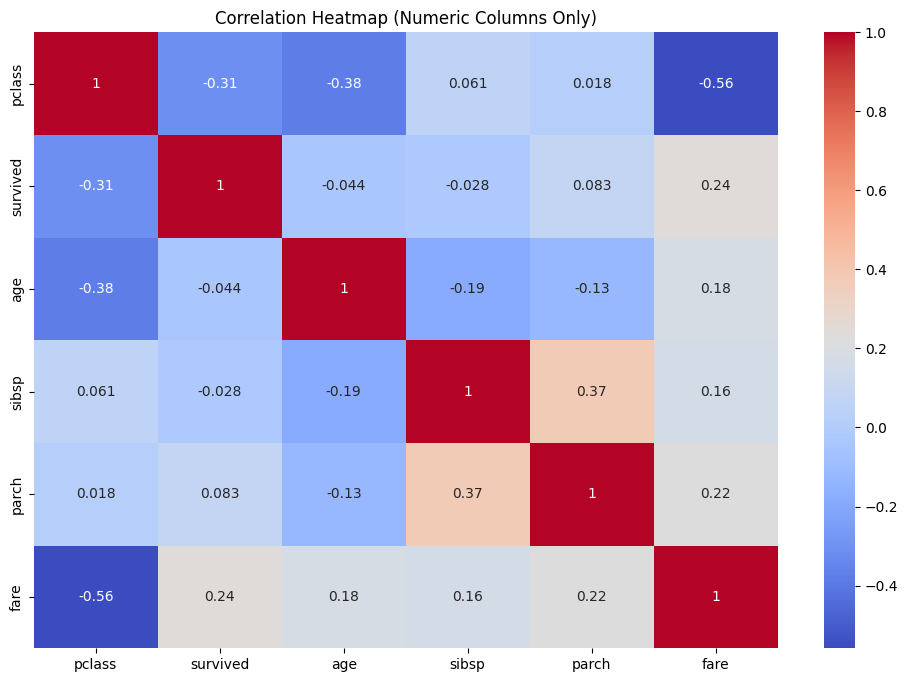

In [179]:
#correlation heatmat(find feature relationship)
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

#  Observations:
# - Positive correlation between 'sibsp' and 'parch' (family size related).
# - Fare and pclass are negatively correlated (higher class -> more fare).
# - Survival has weak but visible positive correlation with 'fare' (rich survived more)


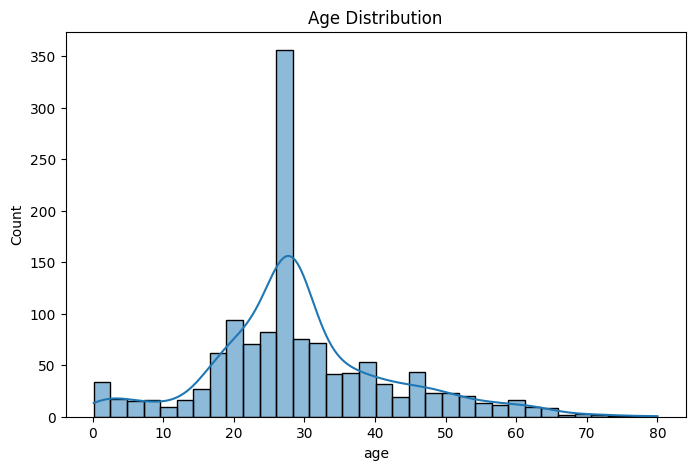

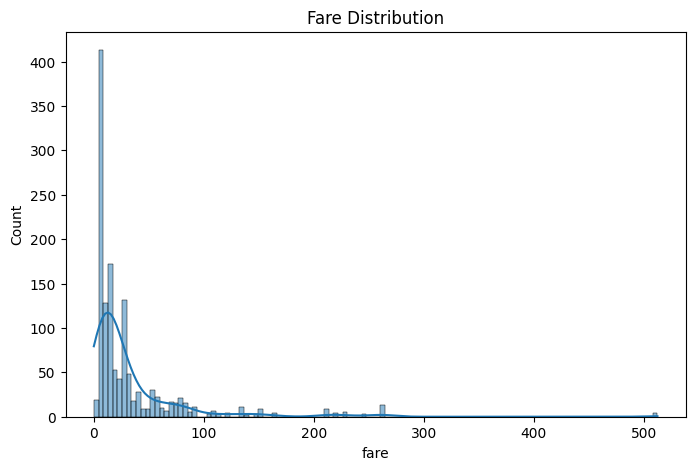

In [151]:
#plotting distributin (histrogram for age and fare
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()
#Shows the frequency of different age groups

# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')
plt.show()
# - Displays the frequency of different fare values

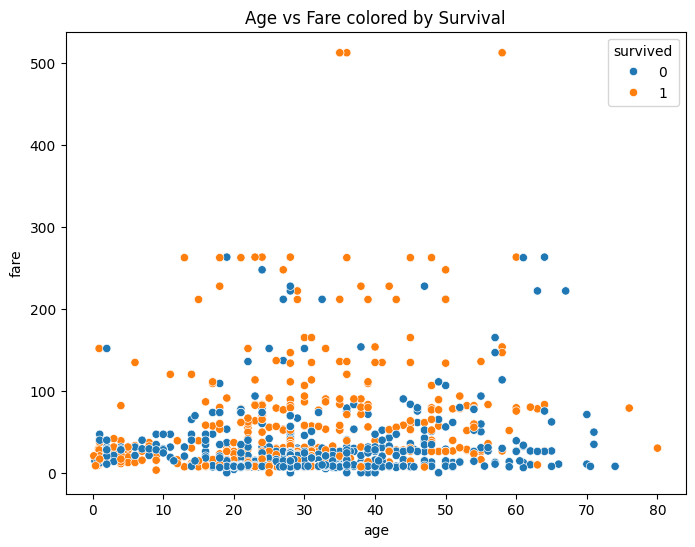

In [152]:
#relationship between variable(scatter plot age vs fare)
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare colored by Survival')
plt.show()
 #-This plot shows how age and fare are related.
# - Each point represents a person, with age on the X-axis and fare on the Y-axis.
# - The color of the points shows whether the person survived or not (hue='survived').

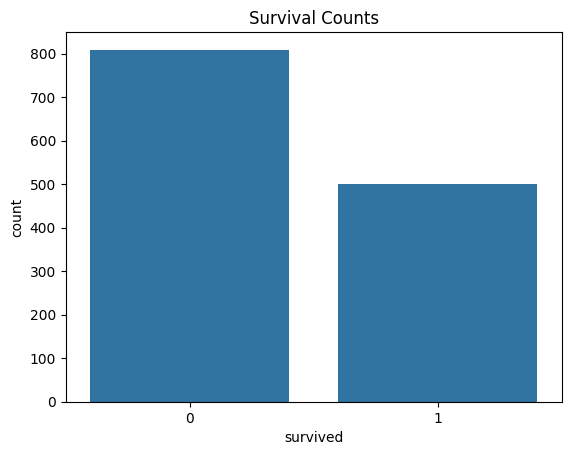

In [153]:
#categorical analysis(countplot)
# Survived vs Not
sns.countplot(x='survived', data=df)
plt.title('Survival Counts')
plt.show()
# - This plot shows how many people survived vs. how many didn’t.
# - The X-axis represents whether a person survived (0 = No, 1 = Yes).
# - The Y-axis shows the count of people in each category (survived or not).


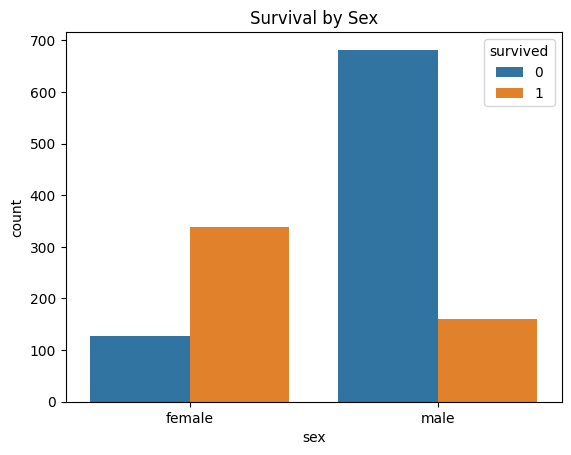

In [154]:
# Survival by Gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Sex')
plt.show()
# - This plot shows the survival counts grouped by gender.
# - The X-axis represents gender (male or female).
# - The hue (color) distinguishes whether a person survived (1) or didn’t survive (0).
# - The Y-axis shows the count of survivors and non-survivors within each gender group.


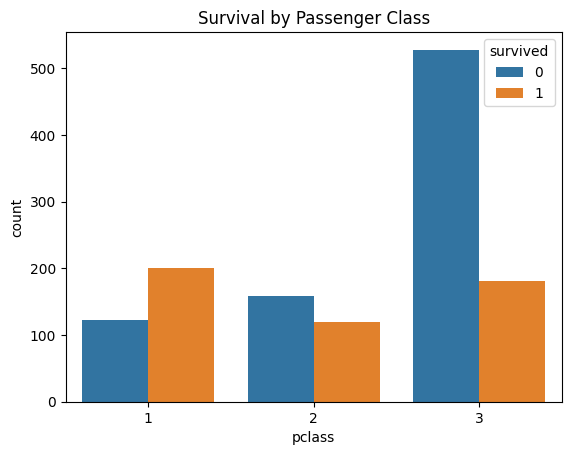

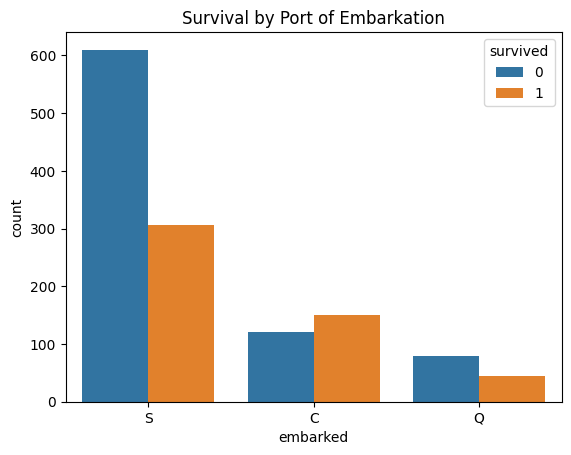

In [155]:
# Survival by Pclass
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()
#  Shows how survival rates vary by passenger class (1st, 2nd, 3rd)
# Typically, passengers in higher classes had better chances of survival

# Survival by Embarked
sns.countplot(x='embarked', hue='survived', data=df)
plt.title('Survival by Port of Embarkation')
plt.show()
#  Displays survival counts for passengers from different embarkation ports (C, Q, S)
#  Can reveal whether boarding location influenced survival outcomes


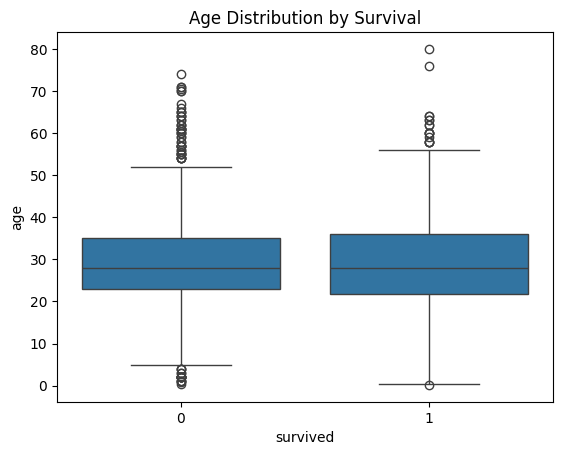

In [156]:
# Age vs Survived
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()
#  Compares the age ranges of survivors and non-survivors
# Helps identify if younger or older people were more likely to survive


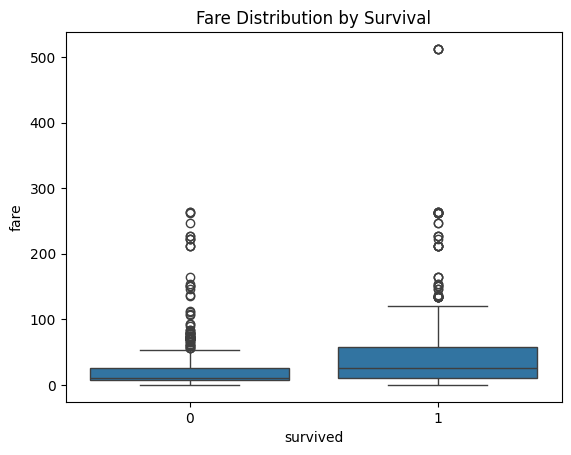

In [157]:
# Fare vs Survived
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()
# Compares the fare amounts between survivors and non-survivors
# Indicates whether passengers who paid higher fares were more likely to survive

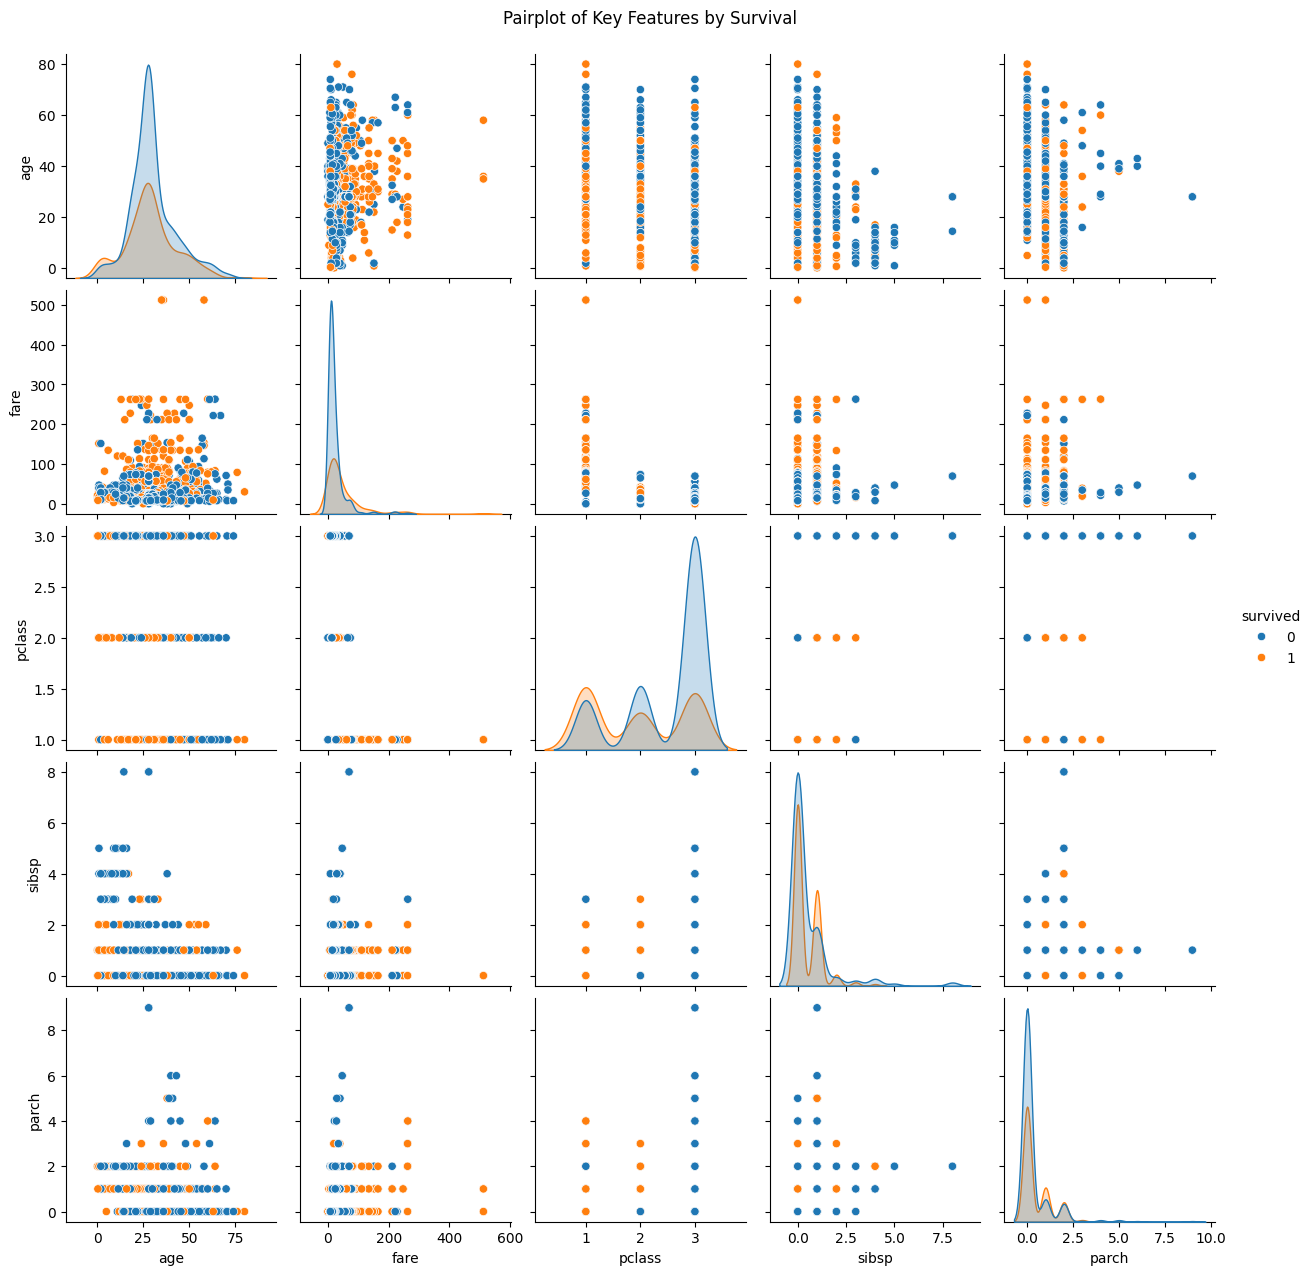

In [158]:
selected_cols = ['survived', 'age', 'fare', 'pclass', 'sibsp', 'parch']
sns.pairplot(df[selected_cols], hue='survived')
plt.suptitle('Pairplot of Key Features by Survival', y=1.02)
plt.show()
# Shows pairwise relationships between multiple features colored by survival
# Helps identify patterns or groupings based on survival status
# Useful for spotting correlations and how features interact visually


In [180]:
print(df['sex'].value_counts())
#  Shows the number of male and female passengers 	embarked 	embarked
#  Helps identify gender distribution in the dataset

print(df['embarked'].value_counts())
#  Shows how many passengers boarded from each port (C = Cherbourg, Q = Queenstown, S = Southampton)
#  Useful to understand the most common embarkation points

print(df['pclass'].value_counts())
# Displays the number of passengers in each passenger class (1st, 2nd, 3rd)
# Helps identify class distribution and possible data imbalance


sex
male      843
female    466
Name: count, dtype: int64
embarked
S    916
C    270
Q    123
Name: count, dtype: int64
pclass
3    709
1    323
2    277
Name: count, dtype: int64


In [181]:
# Summary 

# Most passengers were between 20–40 years old.
# Higher **fare** was positively related to **survival**.
# **Females** had a much higher survival rate than **males**.
# **1st class** passengers had better survival chances.
# Passengers who embarked from **Cherbourg (C)** had better survival odds.
# **SibSp** and **Parch** are positively correlated (family size).
